# Transfer Learning Assignment

Download all the data in this <a href='https://drive.google.com/open?id=1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu'>rar_file</a> , it contains all the data required for the assignment.
 When you unrar the file you'll get the files in the following format: <b>path/to/the/image.tif,category</b>
            
    where the categories are numbered 0 to 15, in the following order:
<pre>
    <b>0 letter
    1 form
    2 email
    3 handwritten
    4 advertisement
    5 scientific report
    6 scientific publication
    7 specification
    8 file folder
    9 news article
    10 budget
    11 invoice
    12 presentation
    13 questionnaire
    14 resume
    15 memo</b>
    
</pre>

There is a file named as 'labels_final.csv' , it consists of two columns. First column is path which is the required path to the images and second is the class label.

In [1]:
#the dataset that you are dealing with is quite large 3.7 GB and hence there are two methods to import the data to Colab 
# Method 1- you can use gdown module to get the data directly from Google drive to Colab
# the syntax is as follows !gdown --id file_id , for ex - running the below cell will import the rvl-cdip.rar dataset


In [2]:
#!gdown --id 1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu

In [3]:
# Method -2 you can also import the data using wget function
#https://www.youtube.com/watch?v=BPUfVq7RaY8

In [4]:
#unrar the file
#get_ipython().system_raw("unrar x rvl-cdip.rar")

## 2. On this image data, you have to train 3 types of models as given below You have to split the data into Train and Validation data.

In [5]:
#import all the required libraries
import os
import tensorflow as tf
import numpy as np
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.applications.vgg16 import VGG16

df=pd.read_csv('/kaggle/input/aaic-assignment-tl/labels_final.csv',dtype=str)



3. Try not to load all the images into memory, use the gernarators that we have given the reference notebooks to load the batch of images only during the train data.
or you can use this method also
<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1</a>

<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c</a>

Note- In the reference notebook you were dealing with jpg images, in the given dataset you are dealing with tiff images. Imagedatagenrator works with both type of images. If you want to use custom data pipeline then you have to convert your tiff images to jpg images.

4. You are free to choose Learning rate, optimizer, loss function, image augmentation, any hyperparameters. but you have to use the same architechture what we are asking below. 

5. Use tensorboard for every model and analyse your gradients. (you need to upload the screenshots for each model for evaluation)


6. You can check about Transfer Learning in this link - <a href='https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html'>https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html</a>

https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3426/code-example-cats-vs-dogs/8/module-8-neural-networks-computer-vision-and-deep-learning </a>
</pre>

7. Do print model.summary() and draw model_plots for each of the model.

In [6]:
index = [str(i) for i in range(0,16)]
l = ['letter','form', 'email', 'handwritten', 'advertisement', 'scientific report', 'scientific publication', 'specification', 'file folder', 'news article', 'budget', 'invoice', 'presentation', 'questionnaire', 'resume', 'memo']

Labels = {i:j for i,j in zip(index,l)}

In [7]:
df['label'] = df['label'].apply(lambda X: Labels[X])
df.head()

,path,label
0,imagesv/v/o/h/voh71d00/509132755+-2755.tif,handwritten
1,imagesl/l/x/t/lxt19d00/502213303.tif,handwritten
2,imagesx/x/e/d/xed05a00/2075325674.tif,email
3,imageso/o/j/b/ojb60d00/517511301+-1301.tif,handwritten
4,imagesq/q/z/k/qzk17e00/2031320195.tif,specification


In [8]:
#Image data Generator class
datagen = ImageDataGenerator(rescale=1/255., validation_split=0.25)

In [9]:
# Train Data
train_generator = datagen.flow_from_dataframe(
                  dataframe = df,
                  directory = '/kaggle/input/aaic-assignment-tl/data_final',
                  x_col = 'path',
                  y_col = "label",
                  subset = "training",
                  batch_size = 24,
                  seed = 42,
                  shuffle = True,
                  class_mode = "categorical",
                  target_size = (224,224))

Found 36000 validated image filenames belonging to 16 classes.


In [10]:
# Test Data
test_generator = datagen.flow_from_dataframe(
                  dataframe = df,
                  directory = '/kaggle/input/aaic-assignment-tl/data_final',
                  x_col = 'path',
                  y_col = "label",
                  subset = "validation",
                  batch_size = 24,
                  seed = 42,
                  shuffle = True,
                  class_mode = "categorical",
                  target_size = (224,224))

Found 12000 validated image filenames belonging to 16 classes.


### Model-1

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights. 
2. After VGG-16 network without FC layers, add a new Conv block ( 1 Conv layer and 1 Maxpooling ), 2 FC layers and an output layer to classify 16 classes. You are free to choose any hyperparameters/parameters of conv block, FC layers, output layer. 
3. Final architecture will be <b>INPUT --> VGG-16 without Top layers(FC) --> Conv Layer --> Maxpool Layer --> 2 FC layers --> Output Layer</b>
4.Print model.summary() and plot the architecture of the model. 
<a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>Reference for plotting model</a>
5. Train only new Conv block, FC layers, output layer. Don't train the VGG-16 network. 

</pre>

In [11]:
import datetime
%load_ext tensorboard

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16

image_size = [224, 224]
vgg = VGG16(weights='imagenet', include_top=False, input_shape=image_size + [3])

2022-12-05 13:50:07.779289: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 13:50:07.780210: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 13:50:07.910088: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 13:50:07.910937: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 13:50:07.911745: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

58900480/58889256 [==============================] - 0s 0us/step


In [13]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
from keras.models import Model

for layer in vgg.layers:
    layer.trainable = False

x = vgg.output
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = MaxPool2D(2,2)(x)
x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)

output = Dense(16, activation='softmax')(x)
    
model = Model(inputs = vgg.input, outputs = output)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
#compiling 
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-12-05 12:50:15.637725: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-05 12:50:15.637937: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-05 12:50:15.640584: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 2 GPUs
2022-12-05 12:50:16.112046: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-05 12:50:16.112232: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [18]:
#fitting generator
model.fit_generator(train_generator, epochs=5, validation_data=test_generator, callbacks = [tensorboard_callback])

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-12-05 12:50:16.591673: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-12-05 12:50:18.845107: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


   1/1500 [..............................] - ETA: 5:45:41 - loss: 2.7801 - accuracy: 0.1250

2022-12-05 12:50:30.488855: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-05 12:50:30.488899: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


   2/1500 [..............................] - ETA: 21:36 - loss: 3.0590 - accuracy: 0.1042  

2022-12-05 12:50:31.338665: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-05 12:50:31.339023: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-12-05 12:50:31.520625: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 158 callback api events and 155 activity events. 
2022-12-05 12:50:31.531165: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


   3/1500 [..............................] - ETA: 15:07 - loss: 2.9835 - accuracy: 0.0972

2022-12-05 12:50:31.547736: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20221205-125015/train/plugins/profile/2022_12_05_12_50_31

2022-12-05 12:50:31.552563: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/20221205-125015/train/plugins/profile/2022_12_05_12_50_31/f63474e0f737.trace.json.gz
2022-12-05 12:50:31.577948: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20221205-125015/train/plugins/profile/2022_12_05_12_50_31

2022-12-05 12:50:31.580522: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/fit/20221205-125015/train/plugins/profile/2022_12_05_12_50_31/f63474e0f737.memory_profile.json.gz
2022-12-05 12:50:31.581255: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: logs/fit/20221205-125015/train/plugins/profile/2022_12_05_12_50_31
D

1500/1500 [==============================] - 425s 274ms/step - loss: 1.4156 - accuracy: 0.5628 - val_loss: 1.2191 - val_accuracy: 0.6267
Epoch 2/5
1500/1500 [==============================] - 239s 159ms/step - loss: 1.0478 - accuracy: 0.6765 - val_loss: 1.0740 - val_accuracy: 0.6763
Epoch 3/5
1500/1500 [==============================] - 239s 159ms/step - loss: 0.9046 - accuracy: 0.7243 - val_loss: 1.0319 - val_accuracy: 0.6987
Epoch 4/5
1500/1500 [==============================] - 238s 159ms/step - loss: 0.8020 - accuracy: 0.7525 - val_loss: 0.9685 - val_accuracy: 0.7132
Epoch 5/5
1500/1500 [==============================] - 242s 161ms/step - loss: 0.7142 - accuracy: 0.7786 - val_loss: 0.9908 - val_accuracy: 0.7086


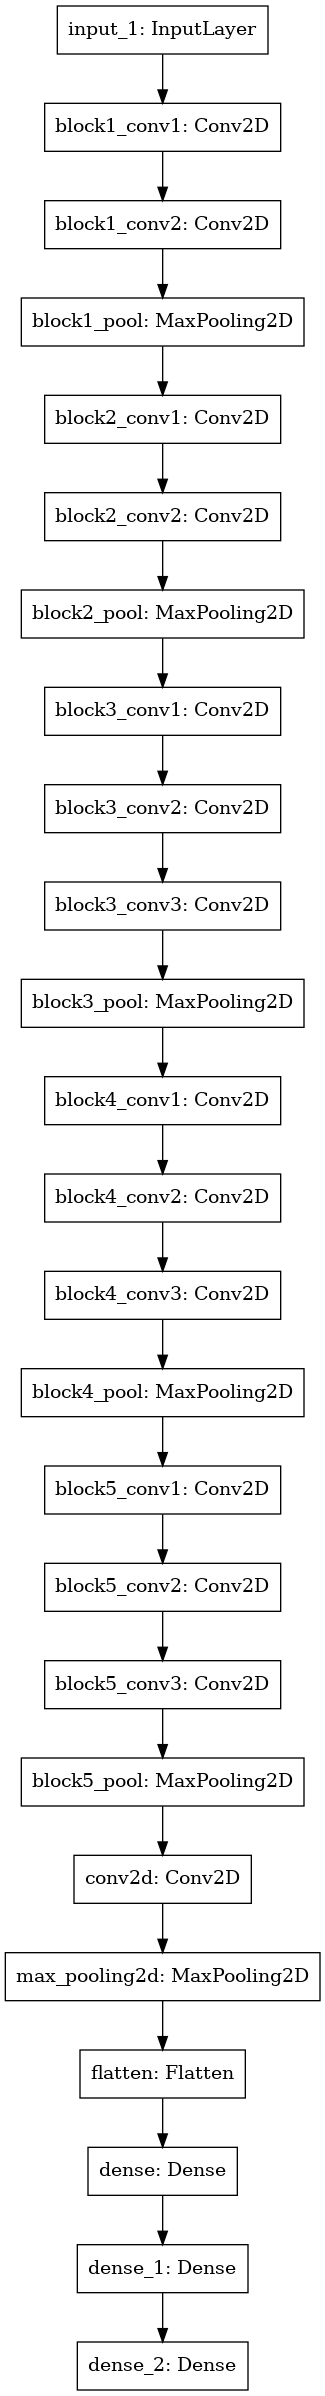

In [19]:
tf.keras.utils.plot_model(model, to_file='model_1.png', show_shapes=False, show_layer_names=True, 
                          rankdir='TB', expand_nested=False, dpi=96)

In [20]:
%tensorboard --logdir logs/fit

### Model-2

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights.
2. After VGG-16 network without FC layers, don't use FC layers, use conv layers only as Fully connected layer.Any FC 
layer can be converted to a CONV layer. This conversion will reduce the No of Trainable parameters in FC layers. 
For example, an FC layer with K=4096 that is looking at some input volume of size 7×7×512 can be equivalently expressed as a CONV layer with F=7,P=0,S=1,K=4096. 
In other words, we are setting the filter size to be exactly the size of the input volume, and hence the output will
simply be 1×1×4096 since only a single depth column “fits” across the input volume, giving identical result as the 
initial FC layer. You can refer <a href='http://cs231n.github.io/convolutional-networks/#convert'>this</a> link to better understanding of using Conv layer in place of fully connected layers.
3. Final architecture will be VGG-16 without FC layers(without top), 2 Conv layers identical to FC layers, 1 output layer for 16 class classification. <b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC -->Output Layer</b>
4. 4.Print model.summary() and plot the architecture of the model. 
<a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>Reference for plotting model</a>
5. Train only last 2 Conv layers identical to FC layers, 1 output layer. Don't train the VGG-16 network. 
</pre>

In [21]:
tf.keras.backend.clear_session()

In [22]:
!rm -rf ./logs/ 

In [23]:
from keras.models import Model

for layer in vgg.layers:
    layer.trainable = False
    
x = vgg.output
x = Conv2D(filters=256, kernel_size=7, activation='relu')(x)
x = Conv2D(filters=256, kernel_size=1, activation='relu')(x)
x = Flatten()(x)

output = Dense(16, activation='softmax')(x)
    
model_2 = Model(inputs = vgg.input, outputs = output)

In [24]:
model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [25]:
#compiling 
model_2.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-12-05 13:13:39.004173: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-05 13:13:39.004226: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-05 13:13:39.627466: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-05 13:13:39.627773: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [27]:
#fitting generator
model_2.fit_generator(train_generator, epochs=5, validation_data=test_generator, callbacks = [tensorboard_callback])

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
   1/1500 [..............................] - ETA: 30:07 - loss: 2.9291 - accuracy: 0.0000e+00

2022-12-05 13:13:41.193102: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-05 13:13:41.193142: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


   2/1500 [..............................] - ETA: 11:32 - loss: 3.5018 - accuracy: 0.0417    

2022-12-05 13:13:41.693989: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-05 13:13:41.694526: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-12-05 13:13:41.844526: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 153 callback api events and 150 activity events. 
2022-12-05 13:13:41.850237: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-05 13:13:41.855355: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20221205-131339/train/plugins/profile/2022_12_05_13_13_41

2022-12-05 13:13:41.858826: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/20221205-131339/train/plugins/profile/2022_12_05_13_13_41/f63474e0f737.trace.json.gz
2022-12-05 13:13:41.866170: I tensorflow/core/profiler/rpc/client/save_profile.cc:

1500/1500 [==============================] - 267s 177ms/step - loss: 1.2857 - accuracy: 0.6064 - val_loss: 1.1430 - val_accuracy: 0.6507


2022-12-05 13:18:08.663562: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1541406720 exceeds 10% of free system memory.


Epoch 2/5
1500/1500 [==============================] - 279s 186ms/step - loss: 0.9325 - accuracy: 0.7128 - val_loss: 1.0027 - val_accuracy: 0.6895


2022-12-05 13:22:51.630951: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1541406720 exceeds 10% of free system memory.


Epoch 3/5
1500/1500 [==============================] - 254s 170ms/step - loss: 0.7947 - accuracy: 0.7546 - val_loss: 0.9243 - val_accuracy: 0.7307


2022-12-05 13:27:09.697479: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1541406720 exceeds 10% of free system memory.


Epoch 4/5
1500/1500 [==============================] - 253s 168ms/step - loss: 0.6858 - accuracy: 0.7873 - val_loss: 1.0334 - val_accuracy: 0.7038


2022-12-05 13:31:26.498037: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1541406720 exceeds 10% of free system memory.


Epoch 5/5
1500/1500 [==============================] - 252s 168ms/step - loss: 0.6053 - accuracy: 0.8089 - val_loss: 0.9719 - val_accuracy: 0.7397


2022-12-05 13:35:42.180760: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1541406720 exceeds 10% of free system memory.


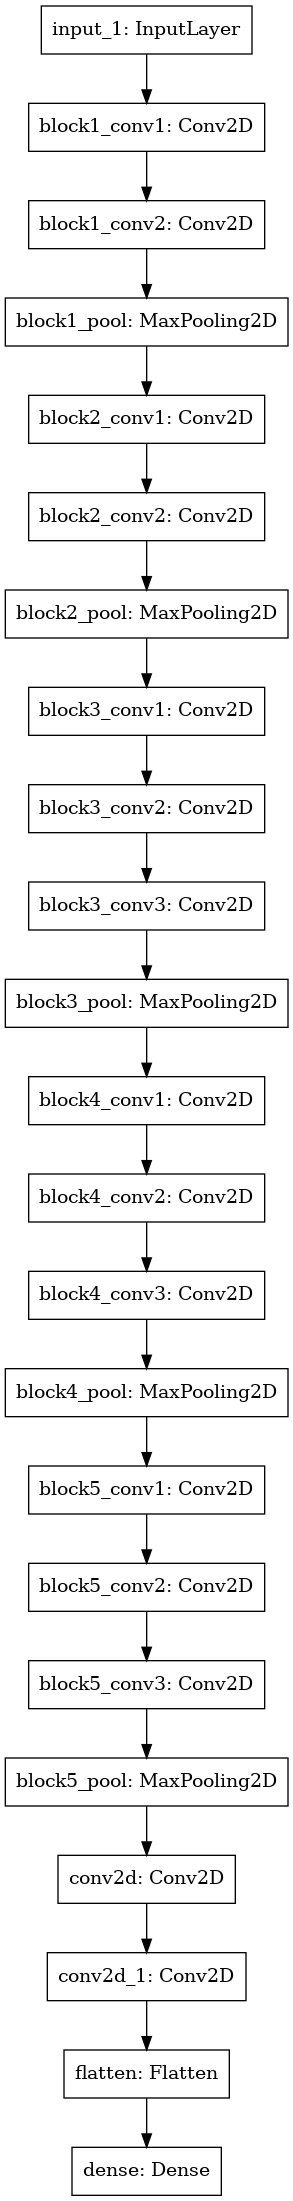

In [28]:
tf.keras.utils.plot_model(model_2, to_file='model_2.png', show_shapes=False, show_layer_names=True, 
                          rankdir='TB', expand_nested=False, dpi=96)

In [29]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 1036), started 0:22:07 ago. (Use '!kill 1036' to kill it.)

### Model-3

<pre>
1. Use same network as Model-2 '<b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC --> Output Layer</b>' and train only Last 6 Layers of VGG-16 network, 2 Conv layers identical to FC layers, 1 output layer.
</pre>

In [31]:
from keras.models import Model

for layer in vgg.layers[-6:]:
    layer.trainable = True
    
x = vgg.output
x = Conv2D(filters=256, kernel_size=7, activation='relu')(x)
x = Conv2D(filters=256, kernel_size=1, activation='relu')(x)
x = Flatten()(x)

output = Dense(16, activation='softmax')(x)
    
model_3 = Model(inputs = vgg.input, outputs = output)

In [32]:
model_3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [33]:
#compiling 
model_3.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-12-05 13:52:59.672927: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-05 13:52:59.673154: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-05 13:52:59.676568: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 2 GPUs
2022-12-05 13:53:00.111634: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-05 13:53:00.111835: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [35]:
#fitting generator
model_3.fit_generator(train_generator, epochs=5, validation_data=test_generator, callbacks = [tensorboard_callback])

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-12-05 13:53:05.753957: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-12-05 13:53:08.303441: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


   1/1500 [..............................] - ETA: 7:40:14 - loss: 2.9513 - accuracy: 0.0000e+00

2022-12-05 13:53:24.244555: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-05 13:53:24.244602: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


   2/1500 [..............................] - ETA: 31:53 - loss: 3.0527 - accuracy: 0.0625      

2022-12-05 13:53:25.497033: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-05 13:53:25.497748: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-12-05 13:53:25.657661: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 361 callback api events and 358 activity events. 
2022-12-05 13:53:25.670974: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-05 13:53:25.693471: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20221205-135259/train/plugins/profile/2022_12_05_13_53_25

2022-12-05 13:53:25.702417: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/20221205-135259/train/plugins/profile/2022_12_05_13_53_25/fb6d4eda6edb.trace.json.gz
2022-12-05 13:53:25.733276: I tensorflow/core/profiler/rpc/client/save_profile.cc:

1500/1500 [==============================] - 643s 417ms/step - loss: 2.7727 - accuracy: 0.0631 - val_loss: 2.7731 - val_accuracy: 0.0637


2022-12-05 14:03:50.729031: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1541406720 exceeds 10% of free system memory.


Epoch 2/5
1500/1500 [==============================] - 601s 401ms/step - loss: 2.7729 - accuracy: 0.0600 - val_loss: 2.7730 - val_accuracy: 0.0593


2022-12-05 14:13:55.851245: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1541406720 exceeds 10% of free system memory.


Epoch 3/5
1500/1500 [==============================] - 591s 394ms/step - loss: 2.7728 - accuracy: 0.0617 - val_loss: 2.7730 - val_accuracy: 0.0584


2022-12-05 14:23:50.930370: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1541406720 exceeds 10% of free system memory.


Epoch 4/5
1500/1500 [==============================] - 590s 393ms/step - loss: 2.7729 - accuracy: 0.0612 - val_loss: 2.7730 - val_accuracy: 0.0584


2022-12-05 14:33:44.647391: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1541406720 exceeds 10% of free system memory.


Epoch 5/5
1500/1500 [==============================] - 583s 389ms/step - loss: 2.7729 - accuracy: 0.0615 - val_loss: 2.7731 - val_accuracy: 0.0619


2022-12-05 14:43:31.623672: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1541406720 exceeds 10% of free system memory.


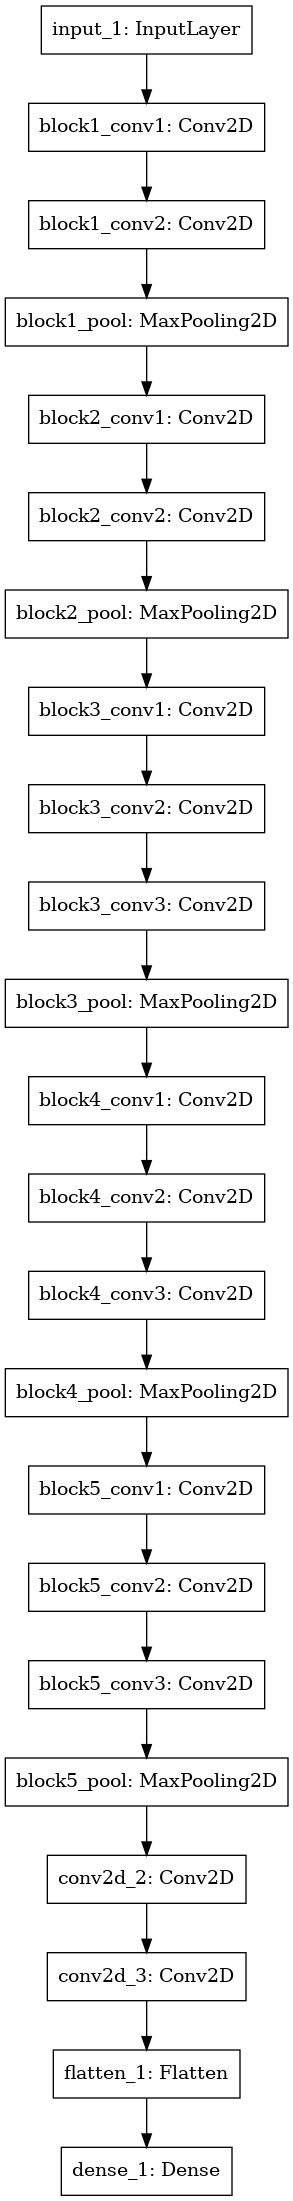

In [36]:
tf.keras.utils.plot_model(model_3, to_file='model_3.png', show_shapes=False, show_layer_names=True, 
                          rankdir='TB', expand_nested=False, dpi=96)

In [37]:
%tensorboard --logdir logs/fit

### Please write your observations or a brief summary of the results that you get after performing transfer learning with reference to model1, model2 and model3

- Accuracy of Model 3 is only 0.0619
- As the number of epochs increases, both train and validation accuracy also increases.
- If we run more than 20 epochs then we may get 0.9+ accuracy for Model 1 and Model 2
- As the number of trainable parameters increases then the model requires more epochs to get high accuracy.
- Model 3 takes more time to train followed by Model 2 followed by Model 1 because trainable parameters are more in Model 3 so it requires more number of epochs.

In [38]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
Table = PrettyTable(["Model", "Number of Epochs", "Train Accuracy", "Validation Accuracy"])
  
# Add rows
Table.add_row(["Model 1", "5", "0.7786", "0.7086"])
Table.add_row(["Model 2", "5", "0.8089", "0.7397"])
Table.add_row(["Model 3", "5", "0.0615", "0.0619"])

print(Table)

+---------+------------------+----------------+---------------------+
|  Model  | Number of Epochs | Train Accuracy | Validation Accuracy |
+---------+------------------+----------------+---------------------+
| Model 1 |        5         |     0.7786     |        0.7086       |
| Model 2 |        5         |     0.8089     |        0.7397       |
| Model 3 |        5         |     0.0615     |        0.0619       |
+---------+------------------+----------------+---------------------+
